Logistic Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


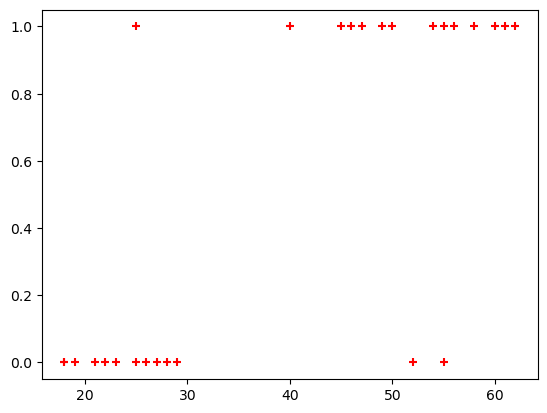

In [4]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [12]:
from sklearn.model_selection import train_test_split

X = df[['age']]
y = df['bought_insurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [16]:
X_test

,age
10,18
0,22
15,55


In [14]:
m.predict(X_test)

array([0, 0, 1])

In [13]:
m.score(X_test, y_test)

1.0

In [15]:
m.predict_proba(X_test)  # shows in 2 classes - 1st class will not buy the insurance, 2nd will buy

array([[0.92960603, 0.07039397],
       [0.88922293, 0.11077707],
       [0.11668242, 0.88331758]])

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [131]:
df = pd.read_csv("dataset/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [133]:
left = df[df.left == 1]
left.shape, left.size

((3571, 10), 35710)

In [134]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

**Average numbers for all columns**

In [20]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

In [138]:
left_department = pd.crosstab(df.salary, df.left)
left_department.columns = ["retained", "left"]
left_department

,retained,left
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

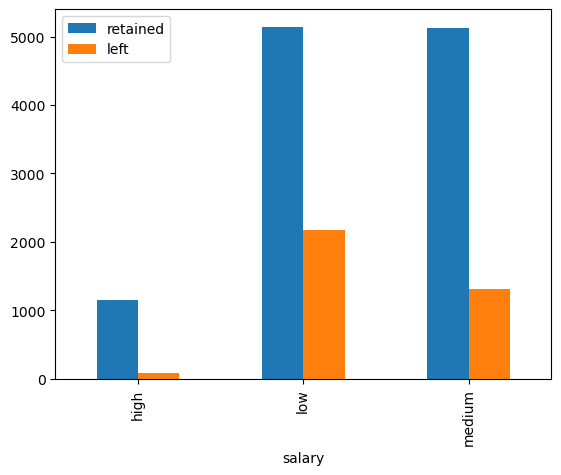

In [140]:
left_department.plot(kind='bar')

<AxesSubplot:xlabel='Department'>

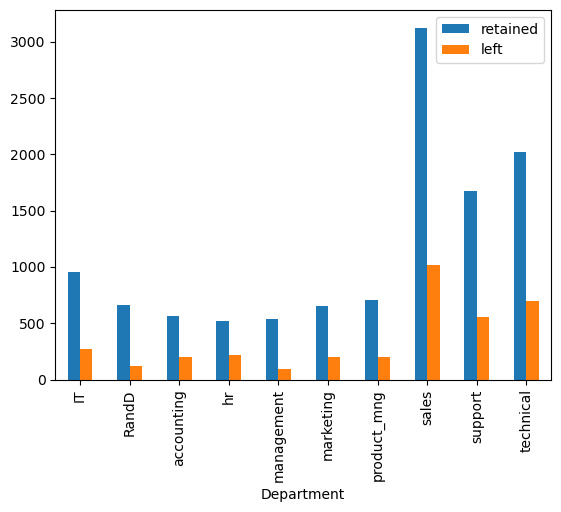

In [144]:
left_department = pd.crosstab(df["Department"], df.left)
left_department.columns = ["retained", "left"]

left_department.plot(kind='bar')

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [145]:
X_pre = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
X_pre.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Preprocessing

In [159]:
salary_df = pd.get_dummies(X_pre.salary, prefix="salary")
y = df["left"]

X = pd.concat([X_pre, salary_df], axis=1)
X = X.drop(["salary", 'salary_high'], axis=1)  #Its better to delete than to fall to trap
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
13239,0.86,171,0,1,0
10601,0.85,208,0,1,0
890,0.43,131,0,0,1
8885,0.68,206,0,0,1
11225,0.82,203,0,1,0
...,...,...,...,...,...
14725,0.83,275,0,1,0
835,0.11,300,0,1,0
2273,0.63,201,0,1,0
614,0.09,296,0,0,1


In [162]:
from sklearn.linear_model import LogisticRegression, LinearRegression

m = LogisticRegression(max_iter=X.size)
# m = LinearRegression()
m.fit(X_train, y_train)

LogisticRegression(max_iter=74995)

In [130]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
3910,0.67,159,0,1,0
9459,0.65,163,0,0,1
4819,0.80,202,0,0,1
13219,0.92,176,0,0,1
11697,0.70,168,0,1,0
...,...,...,...,...,...
6611,0.98,166,0,0,1
12289,0.36,137,0,1,0
4694,0.76,242,0,0,1
645,0.40,141,0,0,1


In [163]:
m.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [167]:
m.score(X_test, y_test)

0.7730370370370371